In [47]:
import matplotlib
# matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd


def initialize(n=100,p_e=0.1):
    global g
    g = nx.erdos_renyi_graph(n,p_e)
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < 0.5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update(p_i=0.5,p_r=0.5):
    global g
    h = g.copy()
    for a in g.nodes:
        if g.nodes[a]['state'] == 0: # if susceptible
            for b in g.neighbors(a):
                if g.nodes[b]['state'] == 1: # if neighbor b is infected
                    h.nodes[a]['state'] = 1 if random() < p_i else 0
        else: # if infected
            h.nodes[a]['state'] = 0 if random() < p_r else 1
    g = h.copy()
    g.pos = nx.spring_layout(g)

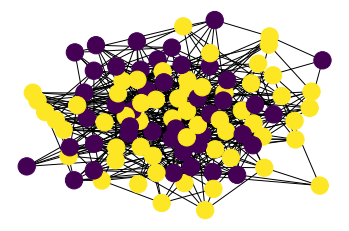

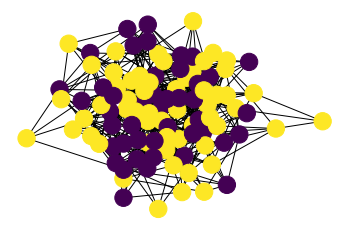

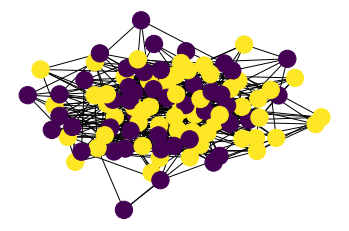

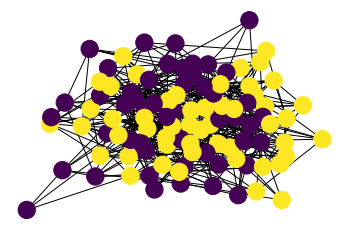

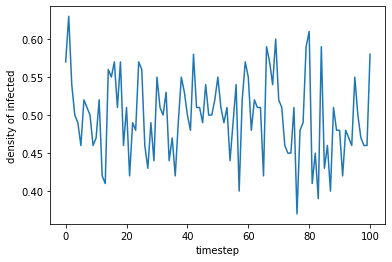

In [48]:
#n = 100, p_e=0.1, p_i=0.5, p_r=0.5

initialize(n=100,p_e=0.1)
densities = [sum([g.nodes[j]['state'] for j in g.nodes])/100] #densities at given timestep
for i in range(100):
    if i%25==0:
        observe()
        plt.show()
    update(p_i=0.5,p_r=0.5)
    densities.append(sum([g.nodes[j]['state'] for j in g.nodes])/100)
plt.plot(np.arange(101),densities)
plt.xlabel('timestep')
plt.ylabel('density of infected')
plt.show()

With these parameters we see how the disease keeps alive, oscillating between around 40% of the population infected and 60%. This matches the prediction of the MFA.

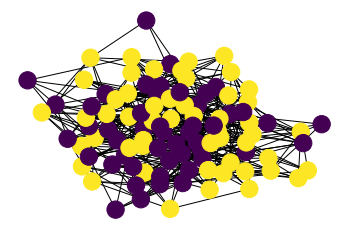

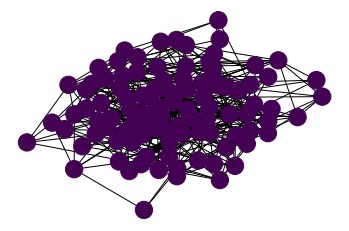

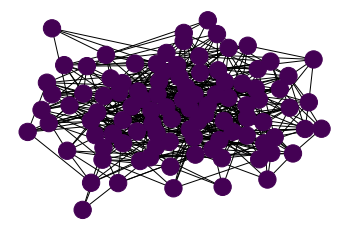

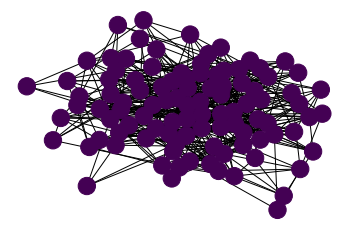

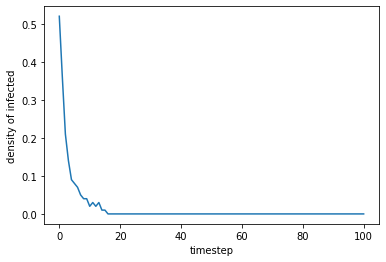

In [52]:
#n = 100, p_e=0.1, p_i=0.04, p_r=0.5

initialize(n=100,p_e=0.1)
densities = [sum([g.nodes[j]['state'] for j in g.nodes])/100] #densities at given timestep
for i in range(100):
    if i%25==0:
        observe()
        plt.show()
    update(p_i=0.04,p_r=0.5)
    densities.append(sum([g.nodes[j]['state'] for j in g.nodes])/100)
plt.plot(np.arange(101),densities)
plt.xlabel('timestep')
plt.ylabel('density of infected')
plt.show()

The disease dies out very quickly. At around the 17th step the disease is dead. This also matches our MFA.

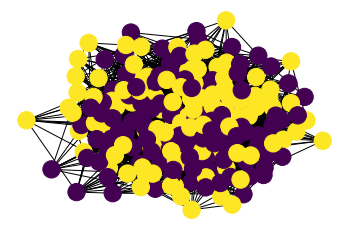

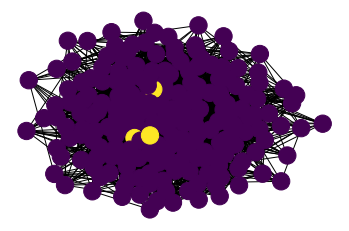

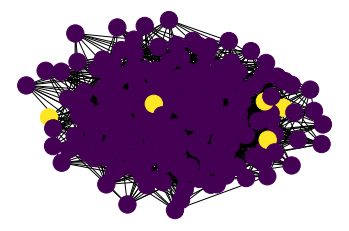

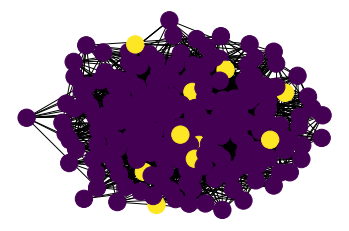

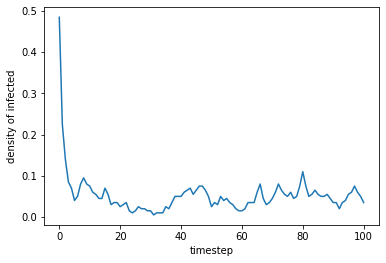

In [56]:
#n = 200, p_e=0.1, p_i=0.04, p_r=0.5

initialize(n=200,p_e=0.1)
densities = [sum([g.nodes[j]['state'] for j in g.nodes])/200] #densities at given timestep
for i in range(100):
    if i%25==0:
        observe()
        plt.show()
    update(p_i=0.04,p_r=0.5)
    densities.append(sum([g.nodes[j]['state'] for j in g.nodes])/200)
plt.plot(np.arange(101),densities)
plt.xlabel('timestep')
plt.ylabel('density of infected')
plt.show()

Although the disease survives at a much lower density of infected, the disease remains in the population oscillating between 5% and 20% of the population. This also matches our MFA prediction. However, it is important to note that since the disease is oscillating at very low densities, it would be possible for the disease to completely die out at some point if the density ever hits 0. In fact, I ran this simulation several times and every now and then the disease died out.

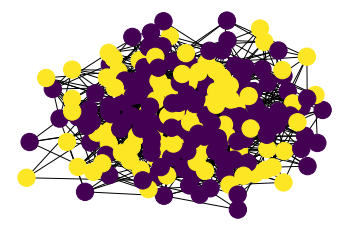

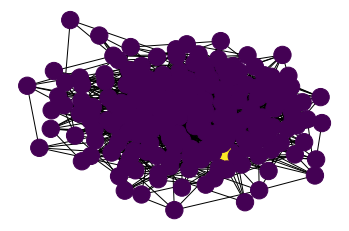

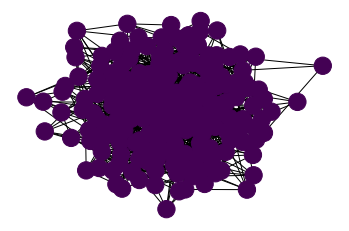

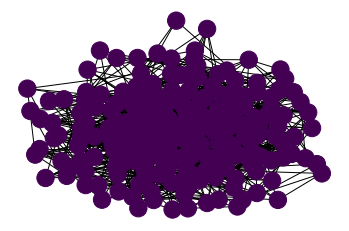

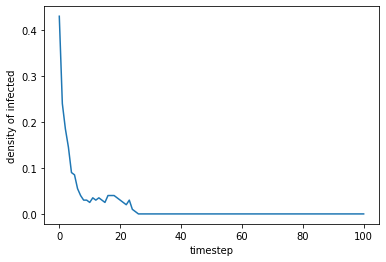

In [57]:
#n = 200, p_e=0.05, p_i=0.04, p_r=0.5

initialize(n=200,p_e=0.05)
densities = [sum([g.nodes[j]['state'] for j in g.nodes])/200] #densities at given timestep
for i in range(100):
    if i%25==0:
        observe()
        plt.show()
    update(p_i=0.04,p_r=0.5)
    densities.append(sum([g.nodes[j]['state'] for j in g.nodes])/200)
plt.plot(np.arange(101),densities)
plt.xlabel('timestep')
plt.ylabel('density of infected')
plt.show()

As expected (according to the MFA), the disease dies out and also very quickly.

### Questions
- Why does using synchronous or asynchronous updating make a difference?

Because in the asynchronous update we randomly choose a single node, we might not choose a node to check for infection in a long time. This can also result in the disease spreading by sections (depending on the choice of the random node to update), rather than uniformly across the whole graph. The asynchronous update seems to simulate real life better since it considers interactions of people with their neighbors at random for every timestep, not having interactions between every two people all at once. However, it is not very realistic to assume "one-sided" interactions (since we only consider whether the chosen node is infected or recovered)

The synchronous update assumes that all nodes interact with their neighbors at a given timestep. It is more realistic in the sense that every interaction is considered two-sidedly, as it would be in real life, but is is more unrealistic in that it assumes that the whole population has "uniformly" distributed interactions with each other at the same time. 

- For the mean field approximation described in Section 18.5, why is it appropriate to use the synchronous update method and not the asynchronous one?

The synchronous update is appropriate for the MFA because the MFA assumes that every node has a probability of becoming infected by another node at a given timestep is given by $1-p_eqp_i$, where $q$ is the density of infected nodes at that given timestep. To make sure that $q$ remains constant throughout the update for a given timestep, the update needs to be synchronous. Otherwise, if we do an asynchronous update, this density $q$ will be different for every node since we keep updating the number of infected nodes every time we do the update for a given single node. 

## "Your friends have more friends than you do"

In [111]:
g1 = nx.erdos_renyi_graph(1000,0.04)
g1_avg_deg = g1.number_of_edges()*2/1000 #average degree
print(g1_avg_deg)

40.396


In [99]:
g2 = nx.watts_strogatz_graph(1000,40,0.2)
g2_avg_deg = len(list(g2.edges()))*2/1000 #average degree
print(g2_avg_deg)

40.0


In [100]:
g3 = nx.barabasi_albert_graph(1000,20)
g3_avg_deg = len(list(g3.edges()))*2/1000 #average degree
print(g3_avg_deg)

39.2


In [101]:
def get_neighbors_degrees(G):
    neighbors_degrees = []
    count = 0
    for edge in G.edges():
        for node in edge:
            neighbors_degrees.append(np.mean([G.degree(x) for x in G.neighbors(node)]))
    return neighbors_degrees

In [102]:
np.mean(get_neighbors_degrees(g1))-g1_avg_deg

0.9988600385623201

In [103]:
np.mean(get_neighbors_degrees(g2))-g2_avg_deg

0.1790500000000037

In [104]:
np.mean(get_neighbors_degrees(g3))-g3_avg_deg

22.587448979591834

We can see that indeed the neighbors' average degree is higher than the graphs average degree because of the friendship paradox. This is even more notable for the barabasi albert network where the difference in avg degree is more than 22, whereas in the other two graphs it is very similar (especially in the watts_strogatz). This makes me think that the friendship paradox is clearer the less uniformity in the graph. The Barabasi network is the least uniform of all given the power law distribution that rules in that graph. The Watts Strogatz is the most uniform and so the difference is smallest there compared to the other two graphs.

In [ ]:
#Code from class

class Simulation:

    def __init__(self, nodes, edges, prob_infect, prob_recover):
        '''
        Set simulation parameters.
        '''
        self.nodes = nodes
        self.edges = edges
        self.prob_infect = prob_infect
        self.prob_recover = prob_recover

    def reset_simulation(self):
        '''
        Initialize node states and clear out the simulation history.
        '''
        for i in self.graph.nodes:
            self.graph.nodes[i]['state'] = 1 if rd.uniform(0, 1) < 0.1 else 0
        self.history = []

    def compute_network_layout(self):
        '''
        Compute the shell layout of the simulation network.
        '''
        nodes_for_degree = {}
        for node in self.graph.nodes:
            degree = self.graph.degree[node]
            nodes_for_degree.setdefault(degree, []).append(node)
        shells = [x[1] for x in sorted(nodes_for_degree.items(), reverse=True)]
        self.layout = nx.shell_layout(self.graph, shells)

    def set_barabasi_albert(self):
        '''
        Set up the simulation to run on a Barabasi-Albert random graph.
        '''
        self.graph = nx.barabasi_albert_graph(self.nodes, self.edges // 2)
        self.compute_network_layout()
        self.reset_simulation()

    def set_watts_strogatz(self):
        '''
        Set up the simulation to run on a Watts-Strogatz random graph.
        '''
        self.graph = nx.watts_strogatz_graph(self.nodes, self.edges, 1)
        self.compute_network_layout()
        self.reset_simulation()

    def set_erdos_renyi(self):
        '''
        Set up the simulation to run on a Erdos-Renyi random graph.
        '''
        self.graph = nx.erdos_renyi_graph(self.nodes, self.edges / (self.nodes - 1))
        self.compute_network_layout()
        self.reset_simulation()

    def observe(self):
        '''
        Plot the network state, degree distribution, and infection history.
        '''
        plt.figure(figsize=(10,5))
        plt.subplot(1, 2, 1)
        plt.plot(self.history)
        plt.xlabel('step')
        plt.ylabel('proportion infected')
        plt.xlim(0, 500)
        plt.ylim(0, max(self.history) * 1.05 if len(self.history) > 0 else 1)
        plt.title('Step: ' + str(len(self.history)))
        plt.subplot(1, 2, 2)
        nx.draw(
            self.graph, edgelist=[], pos=self.layout,
            node_color=[1 - self.graph.nodes[i]['state'] for i in self.graph.nodes],
            alpha=[self.graph.nodes[i]['state'] * 0.5 + 0.5 for i in self.graph.nodes],
            vmin=0, vmax=1, node_size=10)

    def update(self):
        '''
        Update the network state.
        '''
        new_state = {}
        for a in self.graph.nodes:
            if self.graph.nodes[a]['state'] == 0:  # If node is susceptible
                new_state[a] = 0
                for b in self.graph.neighbors(a):  # Check if neighbors are infected
                    if self.graph.nodes[b]['state'] == 1:
                        new_state[a] = 1 if rd.uniform(0, 1) < self.prob_infect else 0
                        if new_state[a] == 1:
                            # Just got infected, so we can stop checking
                            break
            else: # If node is infected
                new_state[a] = 0 if rd.uniform(0, 1) < self.prob_recover else 1
        for i in self.graph.nodes:
            self.graph.nodes[i]['state'] = new_state[i]
        self.history.append(sum(new_state.values()) / len(new_state))

In [ ]:
sim = Simulation(
    1000,  # number of nodes
    20,  # average degree
    0.01,  # infection probability
    0.22)  # recovery probability

sim.set_erdos_renyi()
# sim.set_watts_strogatz()
# sim.set_barabasi_albert()

print('Nodes:', sim.nodes)
degrees = [degree for node, degree in sim.graph.degree]
print('Average degree:', sum(degrees) / len(degrees))
print('Infection rate:', sim.prob_infect)
print('Recovery rate:', sim.prob_recover)

plt.figure()
plt.hist(degrees)
plt.title('Degree histogram')

for step in range(501):
    sim.update()
    if sum(sim.graph.nodes[i]['state'] for i in sim.graph.nodes) == 0:
        sim.observe()
        break
    if step % 50 == 0:
        sim.observe()